# Проверка гипотезы о различии пользователей Яндекс Книги из Москвы и Санкт-Петербурга

- Автор: Руслан Бахтигареев
- Дата: 17.07.2025

## 1. Цели и задачи проекта


**Цель:** Проверить гипотезу о том, что пользователи приложения Яндекс Книги из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг, чем пользователи из Москвы.

- Нулевая гипотеза H₀: Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается.

- Альтернативная гипотеза H₁: Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

**Задачи:**
1. Загрузить данные  и познакомиться с ними. 
2. Подготовить данные к проверке гипотезы, обработать пропуски и дубликаты, привести данные к нужному типу и виду
3. Проверить гипотезу
4. Сформулировать итоговый вывод 

## 2. Описание данных

<font color='#777778'>Здесь приведите описание данных.</font>

Таблица `yandex_knigi_data.csv` содержит следующие поля:

- `Unnamed: 0` — номер строки;

- `city` — город;

- `puid` — идентификатор пользователя;

- `hours` - длительность чтения или прослушивания в часах;

## 3. Содержимое проекта

1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Проверка гипотезы.
4. Итоговые выводы

## 4. Загрузка данных и знакомство с ними

Загружаем данные пользователей из Москвы и Санкт-Петербурга c их активностью (суммой часов чтения и прослушивания) из файла `/datasets/yandex_knigi_data.csv`.

In [8]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns
# Загружаем библиотеки для статистического анализа
from scipy import stats as st

In [9]:
# Выгружаем данные в переменные 
df_yandex_knigi = pd.read_csv('https://code.s3.yandex.net/datasets/yandex_knigi_data.csv')

In [10]:
# Выводим первые строки датафрейма на экран
df_yandex_knigi.head()

,Unnamed: 0,city,puid,hours
0,0,Москва,9668,26.167776
1,1,Москва,16598,82.111217
2,2,Москва,80401,4.656906
3,3,Москва,140205,1.840556
4,4,Москва,248755,151.326434


In [11]:
df_yandex_knigi.tail()

,Unnamed: 0,city,puid,hours
8779,8779,Санкт-Петербург,1130000028554332,4.107774
8780,8780,Санкт-Петербург,1130000030307246,45.069222
8781,8781,Санкт-Петербург,1130000038726322,0.211944
8782,8782,Санкт-Петербург,1130000047892100,4.311841
8783,8783,Санкт-Петербург,1130000061443598,20.847222


In [12]:
# Выводим информацию о датафрейме
df_yandex_knigi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8784 non-null   int64  
 1   city        8784 non-null   object 
 2   puid        8784 non-null   int64  
 3   hours       8784 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 274.6+ KB


#### Вывод
Датасет yandex_knigi_data.csv содержит 4 столбца и 8784 строк, в которых представлена информация об использовании  приложения Яндекс Книги .

После первичного анализа данных можно сделать следующие выводы:
- Столбец 'Unnamed: 0' дублирует номер строки(тип данных int64) , который не несёт дополнительной информации, можно удалить. Названия остальных столбцов корректны, имеют стиль snake case.
- Столбец содержат city содержит название города, тип данных object, лучше подходит тип category
- Столбец puid содержит идентификатор пользователя, тип данных int64 подходит
- Столбец hours содержит информацию о кол-ве прослушанных часов, тип данных float64 подходит
- На первый взгляд нет пропущенных значений, а сами данные соответствуют описанию и выглядят корректными

## 5. Предобработка данных 

### Проверим датасет на пропуски и дубликаты

In [16]:
# Cоздаем копию датасета до преобразования для возможности проверить сделанные изменения после предобработки
temp = df_yandex_knigi.copy() 
len(temp)

8784

In [17]:
# Выводим количество пропущенных строк в датафрейме
df_yandex_knigi.isna().sum()

Unnamed: 0    0
city          0
puid          0
hours         0
dtype: int64

- Пропусков нет

In [19]:
# Убираем дублирующий столбец
df_yandex_knigi = df_yandex_knigi[['city', 'puid', 'hours']]
df_yandex_knigi.head()


,city,puid,hours
0,Москва,9668,26.167776
1,Москва,16598,82.111217
2,Москва,80401,4.656906
3,Москва,140205,1.840556
4,Москва,248755,151.326434


In [20]:
# Проверяем явные дубликаты 
df_yandex_knigi.duplicated().sum()

0

In [21]:
#Уникальные значения в столбце city:
df_yandex_knigi['city'].sort_values().unique()

array(['Москва', 'Санкт-Петербург'], dtype=object)

In [22]:
# Проверяем неявные дубликаты по идентификатору пользователя и кол-ву часов
df_yandex_knigi.duplicated(subset=['puid', 'hours']).sum()


0

In [23]:
# Проверяем неявные дубликаты по идентификатору пользователя
df_yandex_knigi.duplicated(subset='puid').sum()

244

In [24]:
duplicates = df_yandex_knigi.duplicated(subset='puid', keep=False)

# Выводим строки, которые являются дубликатами и сортируем по 'puid'
print(df_yandex_knigi[duplicates].sort_values(by='puid'))


                 city              puid       hours
35             Москва           2637041   10.317371
6247  Санкт-Петербург           2637041    3.883926
134            Москва           9979490   32.415573
6274  Санкт-Петербург           9979490    1.302997
145            Москва          10597984   42.931506
...               ...               ...         ...
6195           Москва  1130000020425037    0.310556
8775  Санкт-Петербург  1130000023864516   14.384722
6202           Москва  1130000023864516  142.830085
6210           Москва  1130000028554332   11.277554
8779  Санкт-Петербург  1130000028554332    4.107774

[488 rows x 3 columns]


- Найдены дубликаты по полю 'puid'
- Дубликаты можно объяснить тем, что пользователи совершают поездки и в это время используют приложение
- Будем считать, что городом проживания будет тот город, где пользователь  провёл  больше времени в приложении, а вторую запись удалим

In [26]:
#Создаем новую колонку 'min_hours' с минимальным значением 'hours' для каждой группы 'puid'
df_yandex_knigi['min_hours'] = df_yandex_knigi.groupby('puid')['hours'].transform('min')

# Создаем маску для строк, которые нужно удалить (дубликаты с минимальным 'hours')
mask_to_drop = (duplicates) & (df_yandex_knigi['hours'] == df_yandex_knigi['min_hours'])

# Удаляем строки, соответствующие маске
df_yandex_knigi = df_yandex_knigi[~mask_to_drop]

# Шаг 5: Удаляем временную колонку 'min_hours'
df_yandex_knigi = df_yandex_knigi.drop('min_hours', axis=1)
# Проверяем неявные дубликаты по идентификатору пользователя
df_yandex_knigi.duplicated(subset='puid').sum()

0

In [27]:
len(df_yandex_knigi)

8540

- Было удалено 244 строки с неявными дубликатами

### Сравним размеры групп, их статистики и распределение.

In [30]:
# Cравним кол-во пользователей из Москвы и Санкт Петербурга
df_yandex_knigi['city'].value_counts()

city
Москва             6099
Санкт-Петербург    2441
Name: count, dtype: int64

In [31]:
df_yandex_knigi['city'].value_counts(normalize=True)

city
Москва             0.714169
Санкт-Петербург    0.285831
Name: proportion, dtype: float64

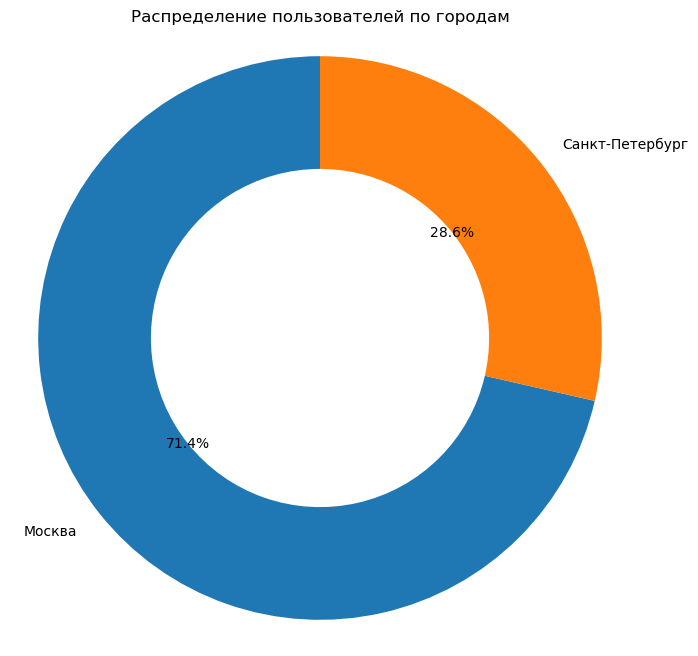

In [32]:
# Группируем данные и считаем количество пользователей из городов
df_cities = df_yandex_knigi.groupby('city')['puid'].nunique()

# Визуализация в виде диаграммы-пончика
plt.figure(figsize=(8, 8))  # Задаём размер фигуры
plt.pie(df_cities ,
        labels=df_cities .index,
        autopct='%1.1f%%',  # Формат отображения процентов
        startangle=90,       # Угол начала
        wedgeprops={'width': 0.4})  # Ширина "пончика"

plt.title('Распределение пользователей по городам')
plt.ylabel('') # удалим название оси Y, тк оно отображается при построении pie chart
plt.axis('equal')  # Чтобы пончик был круглым
plt.show()

 - В Москве живёт 71.4%,  а Санкт-Петербурге 28.6% пользователей. 

#### Исследуем кол-во прослушанных часов для пользователей в Москве 

In [35]:
df_yandex_knigi_moscow = df_yandex_knigi[(df_yandex_knigi['city']=='Москва')]
df_yandex_knigi_moscow['hours'].describe()

count    6099.000000
mean       11.075176
std        37.229705
min         0.000022
25%         0.058889
50%         0.930357
75%         6.025852
max       857.209373
Name: hours, dtype: float64

Минимальное значение 0.000022 ч. и максимальное 857.209373 ч. не являются аномалиями. Пользователи могут по ошибке активировать приложение или же провести за чтением или прослушиванием книг очень много времени. Среднее значение 11.07 ч. существенно выше, чем медиана 0.93 ч., что может говорить о наличии выбросов с высоким значением. Стандартное отклонение 37 ч. говорит о большом разбросе данных.

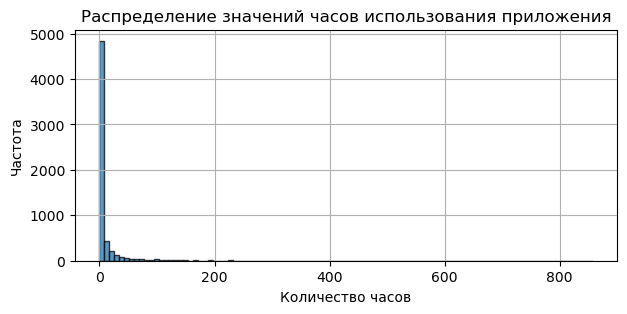

In [37]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df_yandex_knigi_moscow['hours'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=100, # Устанавливаем количество корзин - всего 200
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение значений часов использования приложения')
plt.xlabel('Количество часов')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

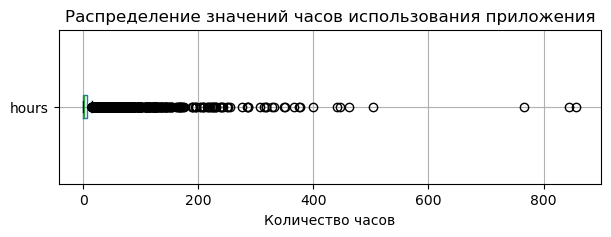

In [38]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце score
df_yandex_knigi_moscow.boxplot(column='hours', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений часов использования приложения')
plt.xlabel('Количество часов')

# Выводим график
plt.show()

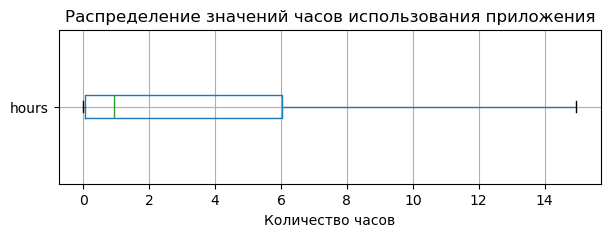

In [39]:

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце score
df_yandex_knigi_moscow.boxplot(column='hours', vert=False,showfliers=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений часов использования приложения')
plt.xlabel('Количество часов')

# Выводим график
plt.show()

- Из-за большого числа выбросов, графическое отображение не позволяют увидеть медиану и квартили. Попробуем убрать выбросы из графика

In [41]:
#Убираем значения выше 95 процентиля и ниже 5 процентиля
outliers1 = df_yandex_knigi_moscow['hours'].quantile(0.95)
outliers2 = df_yandex_knigi_moscow['hours'].quantile(0.05)
df_moscow = df_yandex_knigi_moscow
df_moscow = df_moscow.loc[df_moscow ['hours'] < outliers1]
df_moscow = df_moscow.loc[df_moscow ['hours'] > outliers2]


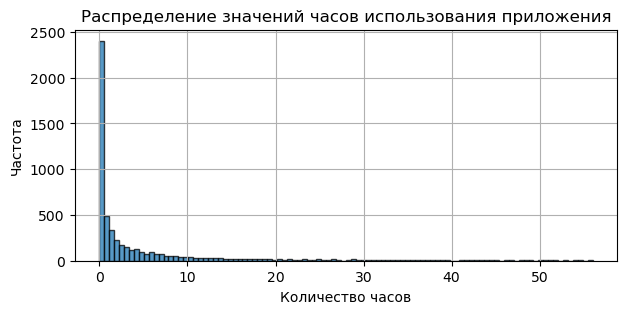

In [42]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df_moscow['hours'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=100, # Устанавливаем количество корзин - всего 200
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение значений часов использования приложения')
plt.xlabel('Количество часов')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

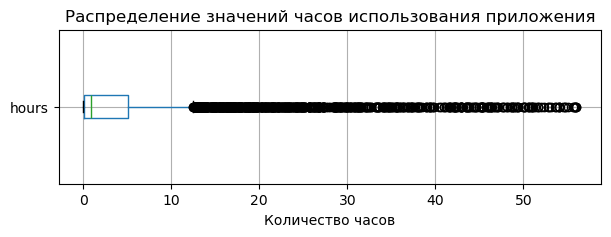

In [43]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце score
df_moscow.boxplot(column='hours', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений часов использования приложения')
plt.xlabel('Количество часов')

# Выводим график
plt.show()

- Типичное время использование приложения(медиана) - чуть меньше 1 часа. Причём 25 % пользователей используют приложение более 6 часов и 25% пользователей не более 6 минут за исследуемый период. Среднее время использования приложения - 11 часов, но поскольку много выбросов с большими и малыми значениями, оно плохо отражает данные.
 - График - правоасимметричное распределение. На графике видно, что центральные 50% значений распределены так, что  пользователи в основном используют приложение  от нескольких минут до 6 часов

#### Исследуем кол-во прослушанных часов для пользователей в Санкт-Петербурге

In [46]:
df_yandex_knigi_saint_petersburg = df_yandex_knigi[(df_yandex_knigi['city']=='Санкт-Петербург')]
df_yandex_knigi_saint_petersburg['hours'].describe()

count    2441.000000
mean       12.028376
std        40.521834
min         0.000025
25%         0.075278
50%         1.025801
75%         6.880545
max       978.764775
Name: hours, dtype: float64

Аналогично минимальное значение 0.000025 ч. и максимальное 978.764775 ч. не являются аномалиями. Пользователи могут по ошибке активировать приложение или же провести за чтением или прослушиванием книг очень много времени. Среднее значение 12.03 ч. существенно выше, чем медиана 1.03 ч., что может говорить о наличии выбросов с высоким значением. Стандартное отклонение 40.5 говорит о большом разбросе данных.

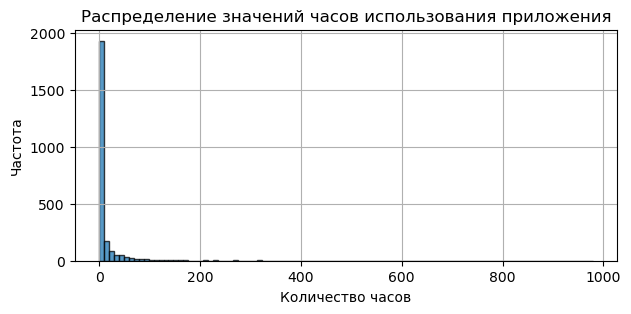

In [48]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df_yandex_knigi_saint_petersburg['hours'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=100, # Устанавливаем количество корзин - всего 200
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение значений часов использования приложения')
plt.xlabel('Количество часов')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

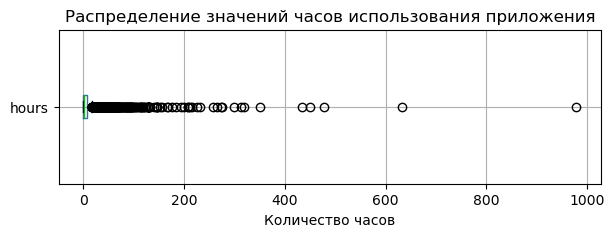

In [49]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце score
df_yandex_knigi_saint_petersburg.boxplot(column='hours', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений часов использования приложения')
plt.xlabel('Количество часов')

# Выводим график
plt.show()

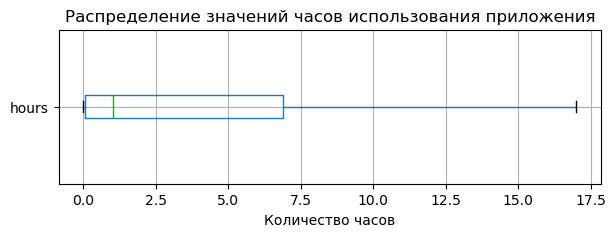

In [50]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце score
df_yandex_knigi_saint_petersburg.boxplot(column='hours', vert=False,showfliers=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений часов использования приложения')
plt.xlabel('Количество часов')

# Выводим график
plt.show()

In [51]:
#Убираем значения выше 95 процентиля и ниже 5 процентиля
outliers12 = df_yandex_knigi_saint_petersburg['hours'].quantile(0.95)
outliers22 = df_yandex_knigi_saint_petersburg['hours'].quantile(0.05)
df_saint_petersburg = df_yandex_knigi_saint_petersburg
df_saint_petersburg = df_saint_petersburg.loc[df_saint_petersburg['hours'] < outliers12]
df_saint_petersburg = df_saint_petersburg.loc[df_saint_petersburg['hours'] > outliers22]

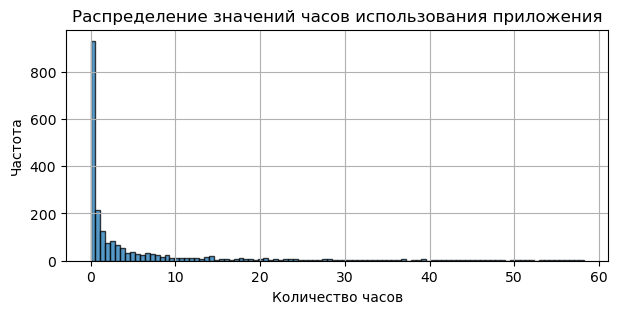

In [52]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df_saint_petersburg['hours'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=100, # Устанавливаем количество корзин - всего 200
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение значений часов использования приложения')
plt.xlabel('Количество часов')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

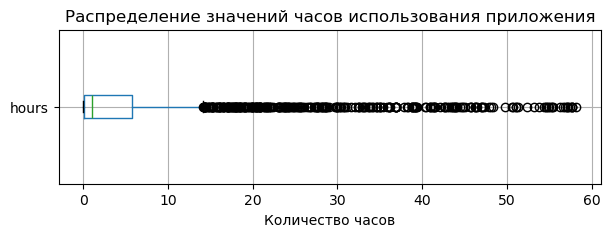

In [53]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце score
df_saint_petersburg.boxplot(column='hours', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений часов использования приложения')
plt.xlabel('Количество часов')

# Выводим график
plt.show()

- Распределение значений очень похоже на то, как это происходит в Москве
- Типичное время использование приложения(медиана) - чуть больше 1 часа. Причём 25 % пользователей используют приложение более 6.9 часов и 25% пользователей не более 7.5 минут за исследуемый период. Среднее время использования приложения - 12 часов, но поскольку много выбросов с большими и малыми значениями, оно плохо отражает данные.
 - График - правоасимметричные распределение. На графике видно, что центральные 50% значений распределены так, что  пользователи в основном используют приложение от нескольких минут до 6.9 часов

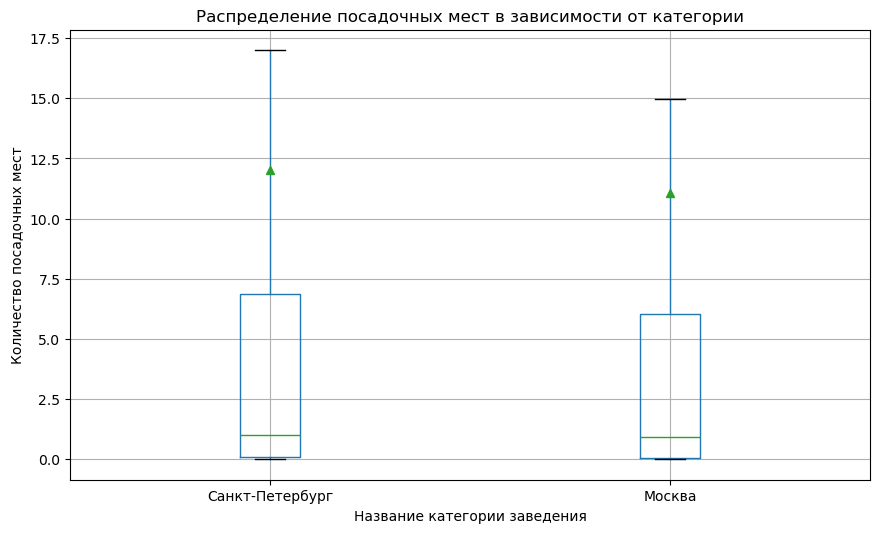

In [55]:
tmp1 = df_yandex_knigi.copy()  # Создаем копию датасета, что бы не работать с исходным

# Вычисление медианы для каждой категории
medians = tmp1.groupby('city')['hours'].median().sort_values(ascending=False)

# Сортировка по медиане
sorted_categories = medians.index
tmp1['city'] = pd.Categorical(tmp1['city'], categories=sorted_categories, ordered=True)

tmp1.boxplot(column='hours', 
             by='city', 
             grid=True,       # Выводим сетку на диаграмму
             showmeans=True, # Зеленый треугольники показывают среднее значение  
             showfliers=False,# Убираем выбросы
             figsize=(10, 6))

# Добавление заголовка и меток осей
plt.title('Распределение посадочных мест в зависимости от категории')
plt.xlabel('Название категории заведения')
plt.ylabel('Количество посадочных мест')

 #  Поворачиваем метки на оси Х, что бы они не сливались 
          # Ограничиваем вывод для того, чтобы боксплоты были крупными, 
                           # если убрать, то будут видны все выбросы
plt.suptitle('')           # Удаление метки "seats" с оси X
plt.show()                 # Отображение диаграммы

- В Санк- Петербурге среднее значение 12.03 ч. , медиана 1.03 ч  и 75 квантиль  6.9 ч. выше, чем в  Москве (среднее значение 11.07 ч., медиана 0.93 ч., 75 квантиль 6 ч. )

## 6. Проверка гипотезы в Python

Гипотеза звучит так: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы.

- Нулевая гипотеза H₀: Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается.

- Альтернативная гипотеза H₁: Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

 - Ранее на графиках распределения часов прослушивания(просмотра) были обнаружены тяжелый хвост и выбросы, что говорит о том, что может не выполнятся одно из условий т - теста - нормальность распределения выборочных средних. Посмотрим на их графики


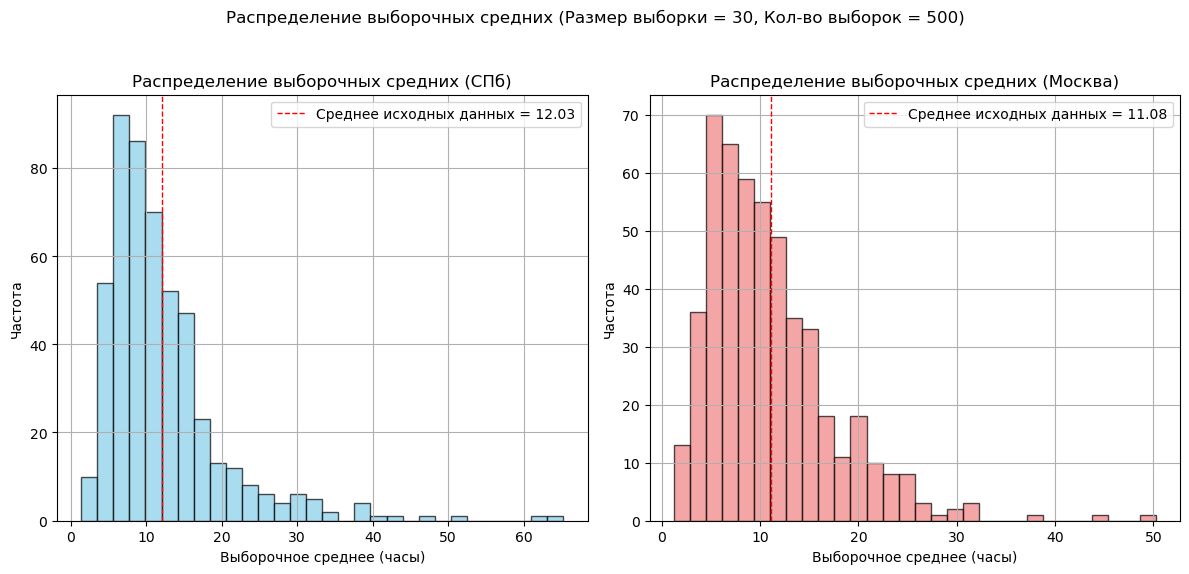

Санкт-Петербург:
  Среднее исходных данных: 12.03
  Среднее выборочных средних: 12.14
  Стандартное отклонение выборочных средних: 7.93

Москва:
  Среднее исходных данных: 11.08
  Среднее выборочных средних: 10.90
  Стандартное отклонение выборочных средних: 6.37


In [59]:

# Выборки
hours_spb = df_yandex_knigi_saint_petersburg['hours']
hours_moscow = df_yandex_knigi_moscow['hours']

 #Параметры
sample_size = 30        # Размер каждой выборки (для выборочного среднего)
num_samples = 500      # Количество выборок для построения распределения выборочных средних

# Функция для создания распределения выборочных средних
def create_sampling_distribution(data, sample_size, num_samples):
    """Создает распределение выборочных средних из предоставленных данных."""
    sample_means = []
    for _ in range(num_samples):
        # Случайным образом выбираем sample_size элементов из data с возвращением
        sample = np.random.choice(data, size=sample_size, replace=True)
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)
    return sample_means

#  Создаем распределения выборочных средних для Санкт-Петербурга и Москвы
spb_sample_means = create_sampling_distribution(hours_spb, sample_size, num_samples)
moscow_sample_means = create_sampling_distribution(hours_moscow, sample_size, num_samples)

#  Строим гистограммы
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # 1 строка, 2 столбца, первый подграфик
plt.hist(spb_sample_means, bins=30, edgecolor='black', alpha=0.7, color='skyblue')
plt.title(f'Распределение выборочных средних (СПб)')
plt.xlabel('Выборочное среднее (часы)')
plt.ylabel('Частота')
plt.grid(True)

# Рисуем вертикальную линию на среднем значении исходных данных СПб
plt.axvline(hours_spb.mean(), color='red', linestyle='dashed', linewidth=1, label=f'Среднее исходных данных = {hours_spb.mean():.2f}')
plt.legend()

plt.subplot(1, 2, 2)  # 1 строка, 2 столбца, второй подграфик
plt.hist(moscow_sample_means, bins=30, edgecolor='black', alpha=0.7, color='lightcoral')
plt.title(f'Распределение выборочных средних (Москва)')
plt.xlabel('Выборочное среднее (часы)')
plt.ylabel('Частота')
plt.grid(True)

# Рисуем вертикальную линию на среднем значении исходных данных Москва
plt.axvline(hours_moscow.mean(), color='red', linestyle='dashed', linewidth=1, label=f'Среднее исходных данных = {hours_moscow.mean():.2f}')
plt.legend()


plt.suptitle(f'Распределение выборочных средних (Размер выборки = {sample_size}, Кол-во выборок = {num_samples})')  # Общий заголовок для двух графиков
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for the suptitle
plt.show()

# Выводим основные статистики для сравнения
print("Санкт-Петербург:")
print(f"  Среднее исходных данных: {hours_spb.mean():.2f}")
print(f"  Среднее выборочных средних: {np.mean(spb_sample_means):.2f}")
print(f"  Стандартное отклонение выборочных средних: {np.std(spb_sample_means):.2f}")

print("\nМосква:")
print(f"  Среднее исходных данных: {hours_moscow.mean():.2f}")
print(f"  Среднее выборочных средних: {np.mean(moscow_sample_means):.2f}")
print(f"  Стандартное отклонение выборочных средних: {np.std(moscow_sample_means):.2f}")


In [60]:
#В начале используем t-тест Стьюдента
# Данные из Москвы
group_msc = df_yandex_knigi_moscow['hours'] 
# Данные из Спб
group_sp = df_yandex_knigi_saint_petersburg['hours']

# Уровень статистической значимости 0.05
alpha = 0.05 

results = st.ttest_ind(
    group_msc, 
    group_sp,
    alternative='less' # Альтернативная гипотеза, которую проверяем: mu1 < mu2
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо. ')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается. ')

p-значение: 0.14875226639116673
Не получилось отвергнуть нулевую гипотезу. Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается. 


In [61]:
#Теперь Тест Манна — Уитни
from scipy.stats import ttest_ind, mannwhitneyu
# Выборка целевой метрики для группы A
metric_a = df_yandex_knigi_moscow['hours'] 
# Выборка целевой метрики для группы B
metric_b= df_yandex_knigi_saint_petersburg['hours']

# На каком уровне значимости проверяем гипотезу о равенстве распределений
alpha = 0.05 

# Применяем тест Манна — Уитни
stat_mw, p_value_mw = mannwhitneyu(
    metric_a, 
    metric_b, 
    alternative='less' # Альтернативная гипотеза Dist(a) < Dist(b)
) 

if p_value_mw > alpha:
    print(f'pvalue={p_value_mw} > {alpha}')
    print('Нулевая гипотеза находит подтверждение! Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается.')
else:
    print(f'pvalue={p_value_mw} < {alpha}')
    print('Нулевая гипотеза не находит подтверждения! Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.')

pvalue=0.06159915490740047 > 0.05
Нулевая гипотеза находит подтверждение! Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается.


- Несмотря на то, что статистики в Санкт-Петербурге выше, чем в Москве, стандартное отклонение достаточно высокое, поэтому разница не является статистически значимой
- T-тест Стьюдента и тест Манна — Уитни показали, что значения статистически значимо не отличаются
- В данном случае мы использовали оба теста, но тест Манна — Уитни лучше подходит, поскольку в распределении тяжелый хвост и много выбросов

## 7. Итоговый вывод
- Нулевая гипотеза H₀: Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается.
- Альтернативная гипотеза H₁: Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.
- Для проверки гипотезы лучше подходит тест Манна- Уитни, поскольку в распределении есть тяжёлый хвост и выбросы. Уровень значимости выбираем стандартным 0.05
- p = 0.06 в тесте Манна - Уитни. В итоге, 6 % вероятность того, что распределение значений в Мск и Спб статистически не различаются, что выше уровня значимости. Нулевая гипотеза не опровергнута!
- Несмотря на то, что статистики в Санкт-Петербурге выше, чем в Москве, стандартное отклонение достаточно высокое, поэтому разница не является статистически значимой. 